In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Banking case data.xlsx to Banking case data.xlsx


In [ ]:
file_name = "Banking case data.xlsx"

# Read each sheet into a separate DataFrame
dfs = pd.read_excel(file_name, sheet_name=None)

# Print the sheet names
sheet_names = list(dfs.keys())
print("Sheet Names:", sheet_names)

# Access each DataFrame using the sheet names
df_sheet1 = dfs['Transaction Data']
df_sheet2 = dfs['Customer Demographics']

Sheet Names: ['Data Dictionary', 'Transaction Data', 'Customer Demographics']


In [ ]:
# Assuming you have a common column named 'customer_id'
merged_df = pd.merge(df_sheet1, df_sheet2, on='Customer_number', how='inner')
merged_df

,Sno,Customer_number,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn,age,job,marital,education,Annual Income,Gender
0,0,1001,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368,M
1,1,1002,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
2,2,1003,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0,33,entrepreneur,married,NaN,4851383,F
3,3,1004,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0,51,technician,married,tertiary,2229818,M
45207,45207,46208,no,1729,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0,121,retired,divorced,primary,2783556,M
45208,45208,46209,no,5715,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512,M
45209,45209,46210,no,668,no,no,telephone,0.0,0,-1,0,unknown,no,211.0,57,blue-collar,married,secondary,4193684,F


In [ ]:
missing_values = merged_df.isnull().sum()
missing_values

Sno                  0
Customer_number      0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
age                  0
job                 13
marital             18
education           21
Annual Income       17
Gender               0
dtype: int64

In [ ]:
###TREATING EDUCATION COLUMN

# Assuming 'your_dataframe' is your DataFrame and 'education' is the column you want to standardize
merged_df['education'] = merged_df['education'].str.lower()
# Assuming 'your_dataframe' is your DataFrame and 'education' is the column you want to correct
merged_df['education'] = merged_df['education'].replace({'ter tiary': 'tertiary', 'primary': 'primary'})
merged_df['education'].fillna('unknown', inplace=True)
# Assuming 'your_dataframe' is your DataFrame and 'Annual Income' is the column you want to inspect
merged_df.groupby('education')['Sno'].nunique()/len(merged_df)*100

education
primary      15.146756
secondary    51.286191
tertiary     29.413196
unknown       4.153856
Name: Sno, dtype: float64

In [ ]:
# TREATING MARITAL
merged_df.dropna(subset=['marital'], inplace=True)
unique_values = merged_df['marital'].unique()
print(unique_values)
merged_df.groupby('marital')['Sno'].nunique()/len(merged_df)*100

['married' 'single' 'divorced']


marital
divorced    11.515058
married     60.190738
single      28.294205
Name: Sno, dtype: float64

In [ ]:
###TREATING JOB
merged_df['job'] = merged_df['job'].replace({'blue-collar': 'blue collar'})
merged_df['job'].fillna('unknown', inplace=True)
unique_values = merged_df['job'].unique()
print(unique_values)

['management' 'technician' 'entrepreneur' 'blue collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [ ]:
# TREATING TERM DEPOSIT
merged_df.dropna(subset=['Term Deposit'], inplace=True)
unique_values = merged_df['Term Deposit'].unique()
print(unique_values)

['no' 'yes']


In [ ]:
#TREATING POUTCOME COLUMN

# Assuming 'your_dataframe' is your DataFrame and 'outcome' is the column you want to update
merged_df['poutcome'] = merged_df['poutcome'].replace(['nan', '????', '?','other'], 'unknown')
merged_df['poutcome'].fillna('unknown',inplace=True)


unique_values = merged_df['poutcome'].unique()
print(unique_values)

['unknown' 'pending' 'failure' 'success']


In [ ]:
###treating contact column

merged_df['contact'] = merged_df['contact'].replace({'Tel': 'telephone','?':'unknown','mobile':'cellular'})
merged_df['contact'].fillna('unknown', inplace=True)

unique_values = merged_df['contact'].unique()
print(unique_values)

['unknown' 'cellular' 'telephone' 'Mobile']


In [ ]:
###TREATING LOAN COLUMN
merged_df.dropna(subset=['loan'], inplace=True)
unique_values = merged_df['loan'].unique()
print(unique_values)

['no' 'yes']


In [ ]:
# Change multiple column names
merged_df.rename(columns={'loan': 'personal_loan', 'hosuing': 'housing_loan','Term Deposit':'Term_Deposit','Annual Income':'Annual_Income'}, inplace=True)


###NUMERICAL DATA

In [ ]:
##TREATING COUNT TRANSACTION

merged_df.dropna(subset=['Count_Txn'], inplace=True)

In [ ]:
###FOR BALANCE COLUMN

merged_df['balance'].replace('??', 0, inplace=True)
merged_df['balance'].replace('??//', 0, inplace=True)
merged_df['balance'].replace('????', 0, inplace=True)
merged_df['balance'].replace('//??', 0, inplace=True)
merged_df['balance'].replace('???', 0, inplace=True)

merged_df.dropna(subset=['balance'],inplace=True)



In [ ]:
merged_df.isnull().sum()

Sno                  0
Customer_number      0
Insurance            0
balance              0
housing              0
personal_loan        0
contact              0
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome             0
Term_Deposit         0
Count_Txn            0
age                  0
job                  0
marital              0
education            0
Annual_Income       17
Gender               0
dtype: int64

In [ ]:

##FOR DURATION COLUMN

# Convert negative values in the 'duration' column to their absolute values
merged_df['duration'] = merged_df['duration'].abs()

merged_df['duration'].fillna('0',inplace=True)


In [ ]:
##TREATING ANNUAL INCOME

merged_df['Annual_Income'].fillna('0',inplace=True)
merged_df['Annual_Income'].replace('\\', '0', inplace=True)

merged_df['Annual_Income'] = pd.to_numeric(merged_df['Annual_Income'], errors='coerce')


In [ ]:
missing_values = merged_df.isnull().sum()
missing_values

Sno                 0
Customer_number     0
Insurance           0
balance             0
housing             0
personal_loan       0
contact             0
duration            0
campaign            0
last_contact_day    0
previous            0
poutcome            0
Term_Deposit        0
Count_Txn           0
age                 0
job                 0
marital             0
education           0
Annual_Income       0
Gender              0
dtype: int64

In [ ]:
# Assuming 'your_dataframe' is your DataFrame
row_index_to_view = 1400 # Replace with the desired row index

specific_row = merged_df.iloc[row_index_to_view]
print(specific_row)


Sno                       1420
Customer_number           2421
Insurance                   no
balance                  698.0
housing                    yes
personal_loan               no
contact                unknown
duration                 223.0
campaign                     2
last_contact_day             1
previous                     0
poutcome               unknown
Term_Deposit                no
Count_Txn                398.0
age                         40
job                 technician
marital                married
education              unknown
Annual_Income          3320094
Gender                       M
Name: 1420, dtype: object


In [ ]:
merged_df

,Sno,Customer_number,Insurance,balance,housing,personal_loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term_Deposit,Count_Txn,age,job,marital,education,Annual_Income,Gender
0,0,1001,no,2143.0,yes,no,unknown,261.0,1,2,0,unknown,no,351.0,58,management,married,tertiary,839368,M
1,1,1002,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,no,326.0,44,technician,single,secondary,1452858,M
2,2,1003,no,2.0,yes,yes,unknown,76.0,1,2,0,unknown,no,422.0,33,entrepreneur,married,unknown,4851383,F
3,3,1004,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,no,113.0,47,blue collar,married,unknown,3207754,F
4,4,1005,no,1.0,no,no,unknown,198.0,1,2,0,unknown,no,342.0,33,unknown,single,unknown,2562322,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,46207,no,825.0,no,no,cellular,0.0,0,-1,0,unknown,yes,152.0,51,technician,married,tertiary,2229818,M
45207,45207,46208,no,1729.0,no,no,cellular,0.0,0,-1,0,unknown,yes,334.0,121,retired,divorced,primary,2783556,M
45208,45208,46209,no,5715.0,no,no,cellular,1127.0,5,184,3,success,yes,381.0,72,retired,married,secondary,443512,M
45209,45209,46210,no,668.0,no,no,telephone,0.0,0,-1,0,unknown,no,211.0,57,blue collar,married,secondary,4193684,F


In [ ]:
merged_df=merged_df.drop(['Sno','Customer_number'],axis=1)

**Outlier Detection**

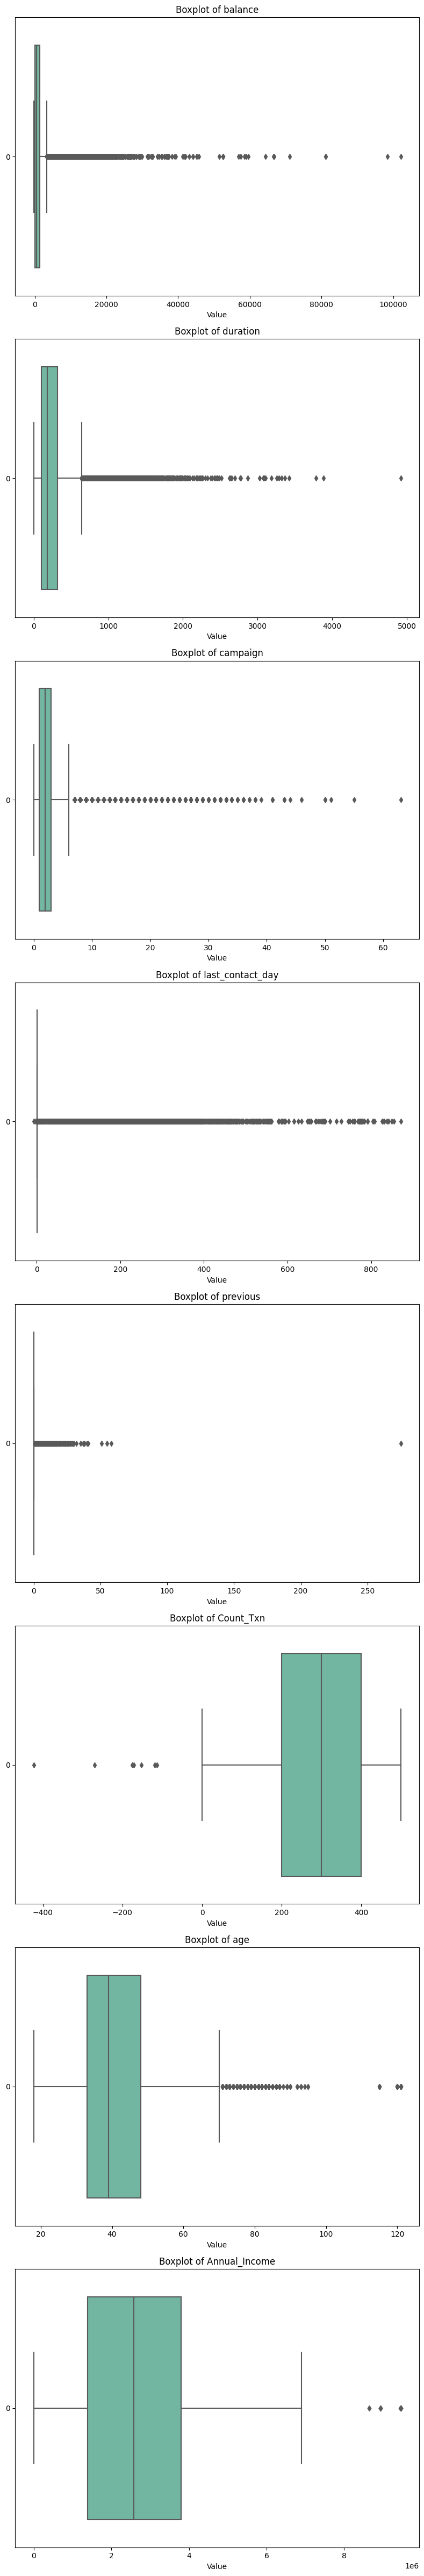

In [ ]:
#columns with numerical values
numerical_columns = ['balance', 'duration', 'campaign', 'last_contact_day', 'previous', 'Count_Txn', 'age', 'Annual_Income']

# Create individual boxplots for each numerical column
plt.figure(figsize=(8, 6 * len(numerical_columns)))  # Adjust figure size based on the number of columns
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(data=merged_df[column], orient="h", palette="Set2")
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Specify the columns with numerical values
numerical_columns = ['balance', 'duration', 'campaign', 'last_contact_day', 'previous', 'Count_Txn', 'age', 'Annual_Income']

merged_df[numerical_columns] = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')
# Define a function to count outliers
def count_outliers(column):
    Q1 = merged_df[column].quantile(0.25)
    Q3 = merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = merged_df[(merged_df[column] < lower_bound) | (merged_df[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for each column
outliers_count = {column: count_outliers(column) for column in numerical_columns}
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
{'balance': 4842, 'duration': 3223, 'campaign': 3057, 'last_contact_day': 8307, 'previous': 8250, 'Count_Txn': 7, 'age': 497, 'Annual_Income': 17}


In [ ]:
import pandas as pd
import numpy as np

numerical_columns = ['balance', 'duration', 'campaign', 'last_contact_day', 'previous', 'Count_Txn', 'age', 'Annual_Income']
data = merged_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Define a function to remove outliers based on a 95% confidence interval for a specific column
def remove_outliers_95_ci(column_data):
    column_data = column_data.dropna()  # Drop NaN values if any

    mean = column_data.mean()
    std = column_data.std()

    # Calculate Z-score for each data point
    z_scores = (column_data - mean) / std

    # Calculate the threshold for a 95% confidence interval
    threshold = 1.96  # For a 95% confidence interval

    # Replace outliers with the median value
    median_val = column_data.median()
    column_data[abs(z_scores) > threshold] = median_val

    return column_data

# Create a copy of the original DataFrame to store filtered data
filtered_data_95_ci = data.copy()

# Remove outliers based on 95% confidence interval for specified numerical columns
for column in numerical_columns:
    if column in data.columns:  # Check if column exists in the DataFrame
        filtered_data_95_ci[column] = remove_outliers_95_ci(data[column])

# Show information about the filtered data
print("Shape of filtered data:", filtered_data_95_ci.shape)

Shape of filtered data: (45121, 8)


In [ ]:
# Get the categorical columns by excluding numerical columns
categorical_columns = [col for col in merged_df.columns if col not in numerical_columns]

# Select the categorical data
categorical_data = merged_df[categorical_columns]

# Merge outlier-removed numerical columns with categorical columns
merged_filtered_data = pd.concat([categorical_data, filtered_data_95_ci[
  numerical_columns]], axis=1)

# Show information about the merged data
print("Shape of merged data:", merged_filtered_data.shape)

Shape of merged data: (45121, 18)


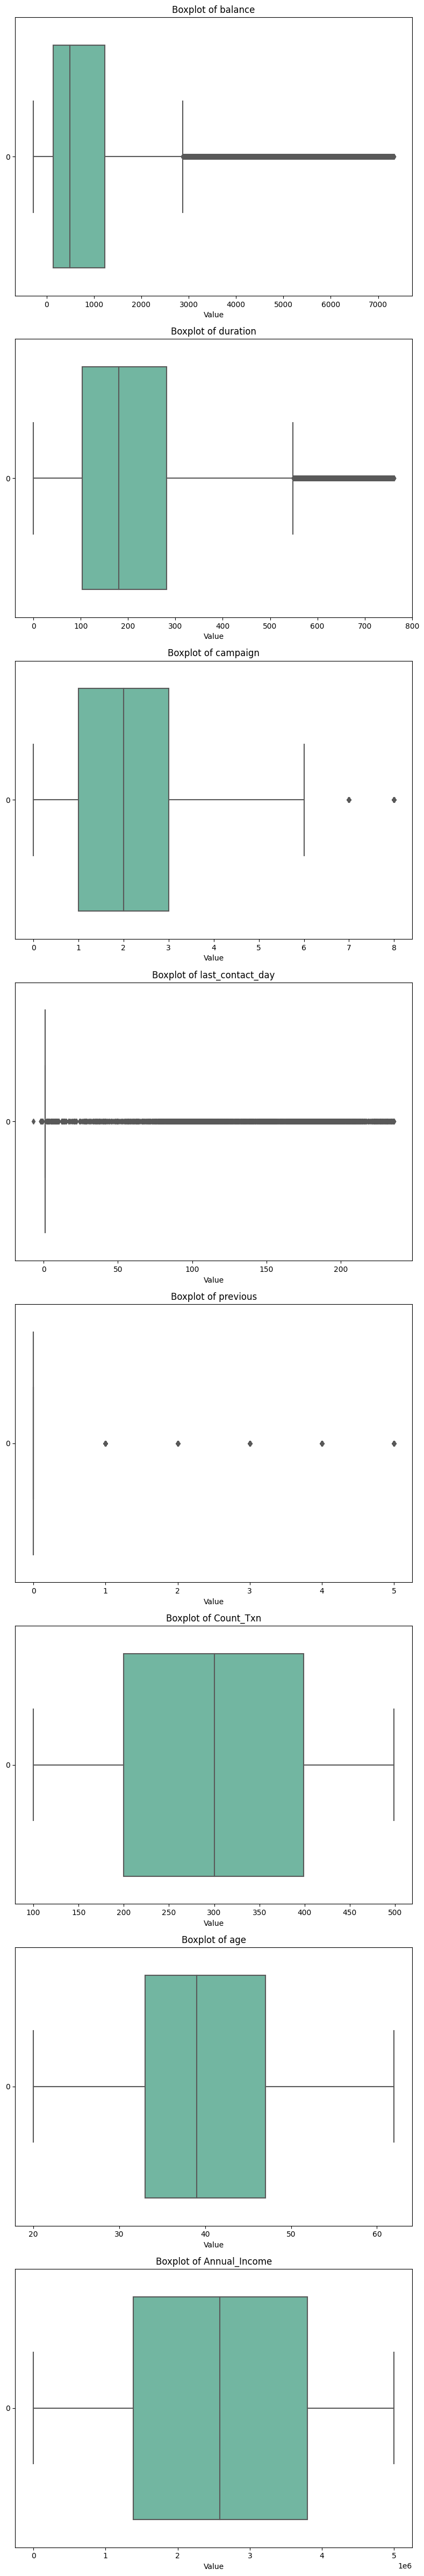

In [ ]:
# Specify the columns with numerical values
numerical_columns = ['balance', 'duration', 'campaign', 'last_contact_day', 'previous', 'Count_Txn', 'age', 'Annual_Income']

# Create individual boxplots for each numerical column
plt.figure(figsize=(8, 6 * len(numerical_columns)))  # Adjust figure size based on the number of columns
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)
    sns.boxplot(data=merged_filtered_data[column], orient="h", palette="Set2")
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
df=merged_filtered_data
df.shape

(45121, 18)

In [ ]:
merged_filtered_data.to_csv('/content/clean_df.csv', index=False)
merged_filtered_data.shape

(45121, 18)

***Data Analysis & Visualization***

 **Income Insights:**

 1. How many customers have no annual income? Plot and present the data distribution of these customers.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
num_no_income_customers = (df['Annual_Income'] == 0).sum()

print(f"Number of customers with no annual income: {num_no_income_customers}")

Number of customers with no annual income: 18


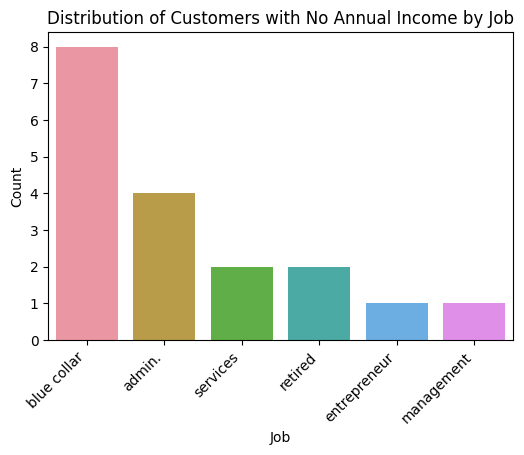

In [ ]:
no_income_customers = df[df['Annual_Income'] == 0]

# Set the color palette
sns.set_palette("magma", 5)

# Plot a count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=no_income_customers, x='job', order=no_income_customers['job'].value_counts().index)
plt.title('Distribution of Customers with No Annual Income by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


As we can see the blue collared proffesionals has majoroly no annual income when comoared to other categories where as management jobed customers have high turn over in there annual income.

The focus point would be majorly on entrepreneur and management proffesionals.

2. **Loan-less Customers Profile:**

Filter out customers who don’t have any type of loan. Plot the distribution of their Income, balance, and profession. How do these metrics differ from those with loans?

In [ ]:
personal_loanless_customers = df[df['personal_loan'] == 'no']
housing_loanless_customers = df[df['housing']=='no']

personal_loanless_customers_count =df[df['personal_loan'] == 'no']['personal_loan'].count()
housing_loanless_customers_count = df[df['housing'] == 'no']['housing'].count()

print(personal_loanless_customers_count)
print(housing_loanless_customers_count)

37889
20062


***Plot the distribution of their Annual Income***

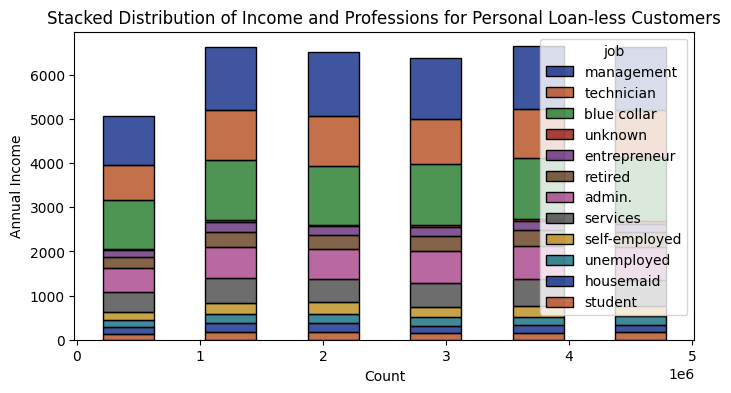

Bin Edges: [-1000000.        0.  1000000.  2000000.  3000000.  4000000.  5000000.
  6000000.]


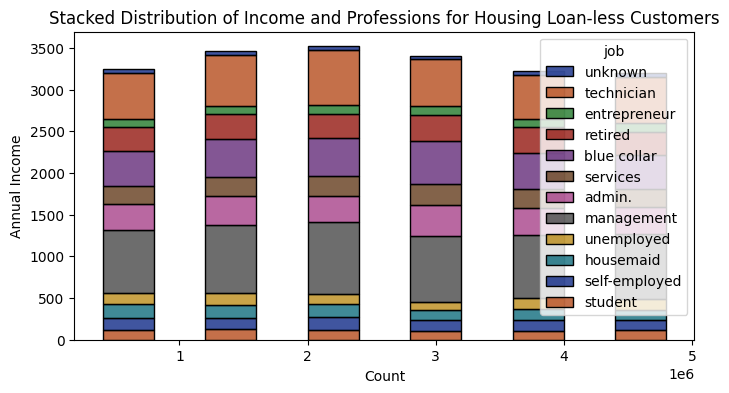

Bin Edges: [      0. 1000000. 2000000. 3000000. 4000000. 5000000. 6000000.]


In [ ]:


plt.figure(figsize=(8, 4)) #Setting figure size

#Histogram for personal loan less customers
hist = sns.histplot(data=personal_loanless_customers, x='Annual_Income',
                    hue='job', multiple='stack', bins=6, palette='dark',
                    shrink=0.5)

# bin edges
bin_edges = hist.get_xticks()

# Title and lables for the plot
plt.title('Stacked Distribution of Income and Professions for Personal Loan-less Customers')
plt.xlabel('Count')
plt.ylabel('Annual Income')

plt.show()

print("Bin Edges:", bin_edges)

#Histogram for housing loan less customers.

plt.figure(figsize=(8, 4)) #figure size

hist = sns.histplot(data= housing_loanless_customers, x='Annual_Income',
                    hue='job', multiple='stack', bins=6, palette='dark',
                    shrink=0.5)

bin_edges = hist.get_xticks()

# Title and lables for the axis of the plot
plt.title('Stacked Distribution of Income and Professions for Housing Loan-less Customers')
plt.xlabel('Count')
plt.ylabel('Annual Income')
plt.show()

# Display bin edges
print("Bin Edges:", bin_edges)

When it comes to **Personal loan** the blue collered jobed customers have taken less personal loans when compared to others

When it is **Hosuing loan** it majorly is management jobed proffesionals who have taken less housing loan compared to others.

***Plot the distribution of their Bank balances.***

In [ ]:
# Assuming 'balance_category' is the column in your DataFrame indicating positive/negative balances
loanless_customers = df[(df['housing'] == 'no') & (df['personal_loan'] == 'no')]

<ipython-input-36-b274735c9716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanless_customers['balance'] = pd.to_numeric(loanless_customers['balance'], errors='coerce')
<ipython-input-36-b274735c9716>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanless_customers['balance_category'] = loanless_customers['balance'].apply(lambda x: 'Positive' if x > 0 else 'Negative')


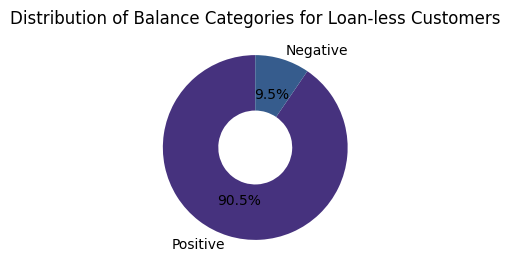

In [ ]:
# Assuming 'balance' column contains numeric and string values
loanless_customers['balance'] = pd.to_numeric(loanless_customers['balance'], errors='coerce')

# Create a new column 'balance_category'
loanless_customers['balance_category'] = loanless_customers['balance'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Plot the distribution of balances

plt.figure(figsize=(5,3))
balance_counts = loanless_customers['balance_category'].value_counts()
plt.pie(balance_counts, labels=balance_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'), wedgeprops=dict(width=0.6))
plt.title('Distribution of Balance Categories for Loan-less Customers')
plt.show()

The customers who doesnt have loan has maintained the decent balance which doent have negative balance.

***Plot the distribution of their Profession.***

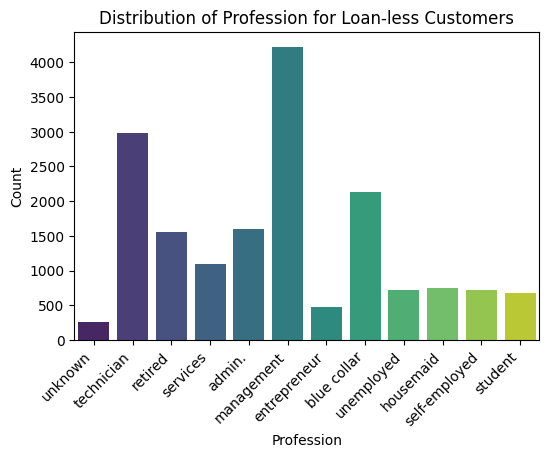

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out customers without any type of loan
loanless_customers = merged_df[(merged_df['housing'] == 'no') & (merged_df['personal_loan'] == 'no')]

# Plot the distribution of the profession
plt.figure(figsize=(6, 4))
sns.countplot(data=loanless_customers, x='job', palette='viridis')
plt.title('Distribution of Profession for Loan-less Customers')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


As seen from the above visual the management proffesionals have taken major loan than compared to any other proffesionals.

***How do these metrics differ from those with loans?***

<ipython-input-38-80b95de50ce2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_customers['balance'] = pd.to_numeric(loan_customers['balance'], errors='coerce')
<ipython-input-38-80b95de50ce2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loanless_customers['balance'] = pd.to_numeric(loanless_customers['balance'], errors='coerce')


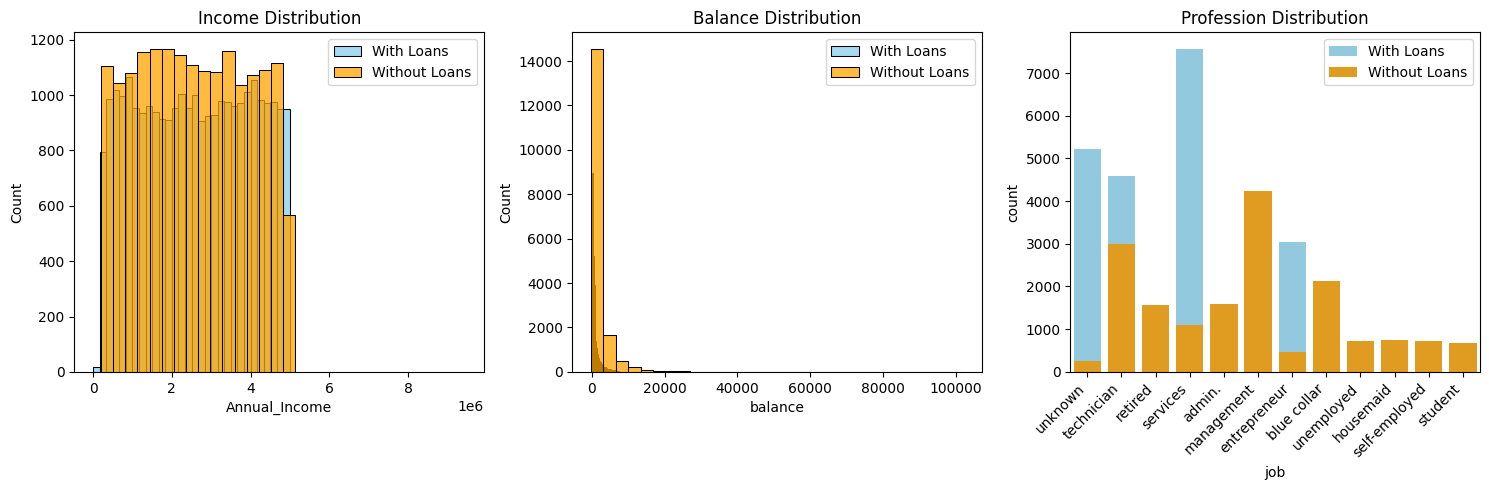

In [ ]:
# Filter out customers with any type of loan
loan_customers = df[(merged_df['housing'] == 'yes') | (df['personal_loan'] == 'yes')]

# Create subplots for comparison
plt.figure(figsize=(15, 5))

# Plot the distribution of Income
# Plot the distribution of Income
plt.subplot(1, 3, 1)
sns.histplot(data=loan_customers, x='Annual_Income', bins=30, kde=False, color='skyblue', label='With Loans')
sns.histplot(data=loanless_customers, x='Annual_Income', bins=30, kde=False, color='orange', label='Without Loans')
plt.title('Income Distribution')
plt.legend()


# Plot the distribution of Balance
# Convert the 'balance' column to numeric, handling errors and coercing to NaN
loan_customers['balance'] = pd.to_numeric(loan_customers['balance'], errors='coerce')
loanless_customers['balance'] = pd.to_numeric(loanless_customers['balance'], errors='coerce')

# Plot the distribution of Balance
plt.subplot(1, 3, 2)
sns.histplot(data=loan_customers, x='balance', bins=30, kde=False, color='skyblue', label='With Loans')
sns.histplot(data=loanless_customers, x='balance', bins=30, kde=False, color='orange', label='Without Loans')
plt.title('Balance Distribution')
plt.legend()



# Plot the distribution of Profession
plt.subplot(1, 3, 3)
sns.countplot(data=loan_customers, x='job', color='skyblue', label='With Loans')
sns.countplot(data=loanless_customers, x='job', color='orange', label='Without Loans')
plt.title('Profession Distribution')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


By looking at the above all 3 graphs we can come into conclusion that
* the data which we have more number of customers who have taken less loan
* The professional who have least income is students and self-employed professionals.
* When it comes to balance the customers who doesnt have loan have actually maintained the balance.

3. Loan and Insurance Analysis:
 Calculate the percentage of customers with a loan who have taken out insurance.
Visualize this data and discuss potential implications.

In [ ]:
# Calculate the percentage of customers with a loan who have taken out insurance
loan_insurance_df = df[df['personal_loan'] == 'yes']
percentage_insured_with_loan = (loan_insurance_df['Insurance'] == 'yes').mean() * 100
percentage_insured_with_loan

# Discuss potential implications
print(f"Percentage of customers with a loan who have taken out insurance: {percentage_insured_with_loan:.2f}%")
print(f"Percentage of customers with a loan who have not taken out insurance: {100 - percentage_insured_with_loan:.2f}%")

Percentage of customers with a loan who have taken out insurance: 4.11%
Percentage of customers with a loan who have not taken out insurance: 95.89%


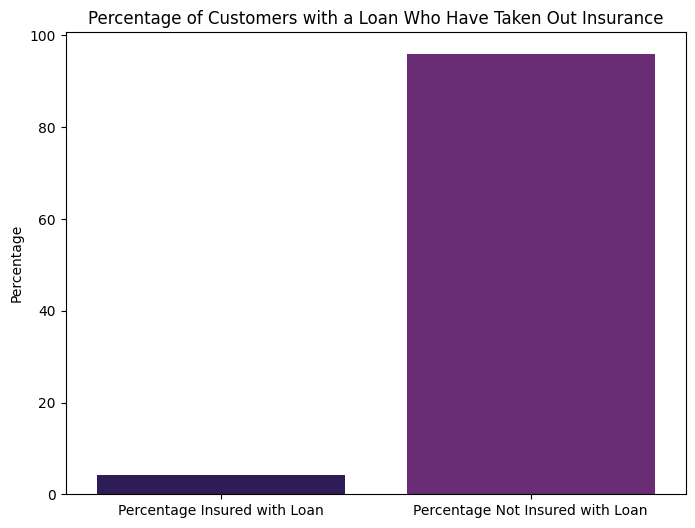

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 6))
sns.barplot(x=['Percentage Insured with Loan', 'Percentage Not Insured with Loan'],
            y=[percentage_insured_with_loan, 100 - percentage_insured_with_loan])
plt.ylabel('Percentage')
plt.title('Percentage of Customers with a Loan Who Have Taken Out Insurance')
plt.show()




In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named customers_df with 'loan' and 'insurance' columns
contingency_table = pd.crosstab(df['personal_loan'], df['Insurance'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05  # significance level
print("\nSignificance Test:")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between having a loan and having insurance.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between having a loan and having insurance.")


Chi-squared value: 263.57577124905265
P-value: 2.851697474359267e-59

Significance Test:
Reject the null hypothesis. There is a significant association between having a loan and having insurance.


Clearly concluding that Percentage of customers with a loan who have not taken out insurance 95.89% when compared to percentage of customers with a loan who have taken out insurance.

There is a significant association between having a loan and having insurance.

4. Communication Strategy Insights:
 Analyse and summarize the best Contact method (with the highest success
percentage) to contact people to ascertain the status of term deposit subscriptions.

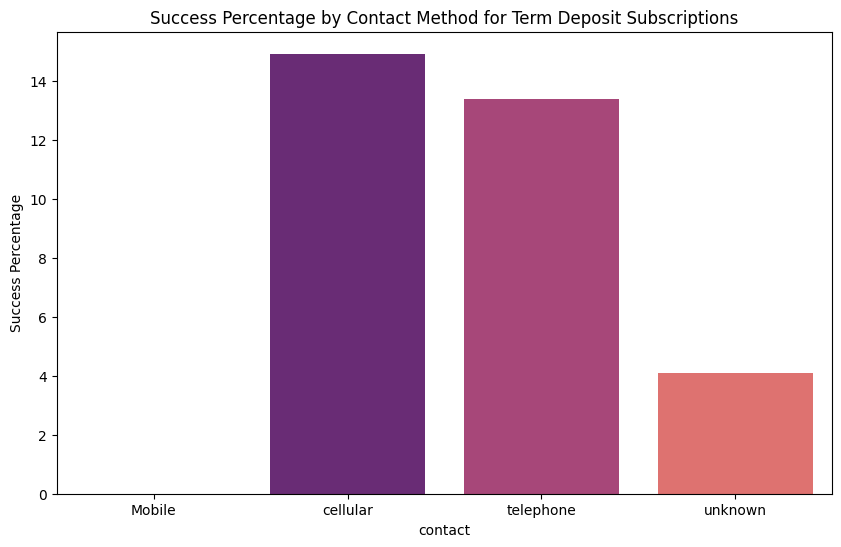

The best contact method for term deposit subscriptions is 'cellular' with a success percentage of 14.93%.


In [ ]:
# Calculate success percentage for each contact method
success_by_contact = df.groupby('contact')['Term_Deposit'].value_counts(normalize=True).unstack().fillna(0)
success_by_contact['Success Percentage'] = success_by_contact['yes'] * 100

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=success_by_contact.index, y=success_by_contact['Success Percentage'])
plt.ylabel('Success Percentage')
plt.title('Success Percentage by Contact Method for Term Deposit Subscriptions')
plt.show()

# Summarize the results
best_contact_method = success_by_contact['Success Percentage'].idxmax()
highest_success_percentage = success_by_contact['Success Percentage'].max()

print(f"The best contact method for term deposit subscriptions is '{best_contact_method}' with a success percentage of {highest_success_percentage:.2f}%.")


The best contact method for term deposit subscriptions is 'cellular' with a success percentage of 14.93%.

5. Age and Home Loans:
 Determine which age group has the highest percentage of home loans. Present this
data visually and discuss possible reasons.

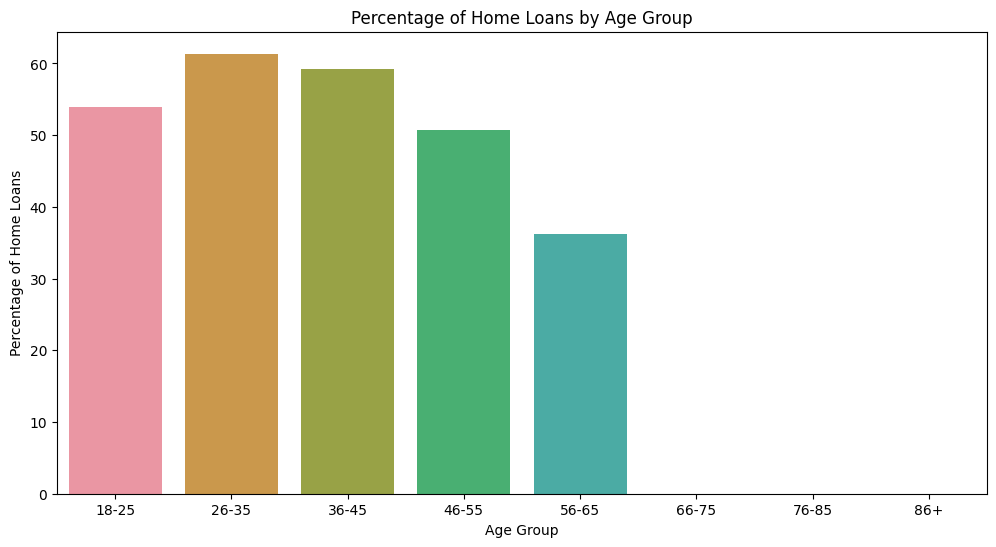

The age group with the highest percentage of home loans is '26-35' with a percentage of 61.35%.


In [ ]:

bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86+']

df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Explicitly define the categories for 'housing'
categories = ['no', 'yes']
df['housing'] = pd.Categorical(df['housing'], categories=categories)

# Calculate the percentage of home loans for each age group
home_loan_percentage_by_age = (
    df.groupby('Age Group')['housing']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)['yes'] * 100

# Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x=home_loan_percentage_by_age.index, y=home_loan_percentage_by_age.values)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Home Loans')
plt.title('Percentage of Home Loans by Age Group')
plt.show()

# Summarize the results
max_home_loan_age_group = home_loan_percentage_by_age.idxmax()
max_home_loan_percentage = home_loan_percentage_by_age.max()

print(f"The age group with the highest percentage of home loans is '{max_home_loan_age_group}' with a percentage of {max_home_loan_percentage:.2f}%.")


The age group with the highest percentage of home loans is '26-35' with a percentage of 61.35%.

6. Income and Age Relationship:
Investigate any relationships between annual income and age group. Use
appropriate plots and statistics to present the findings.

The age group with the highest annual income is: 46-55


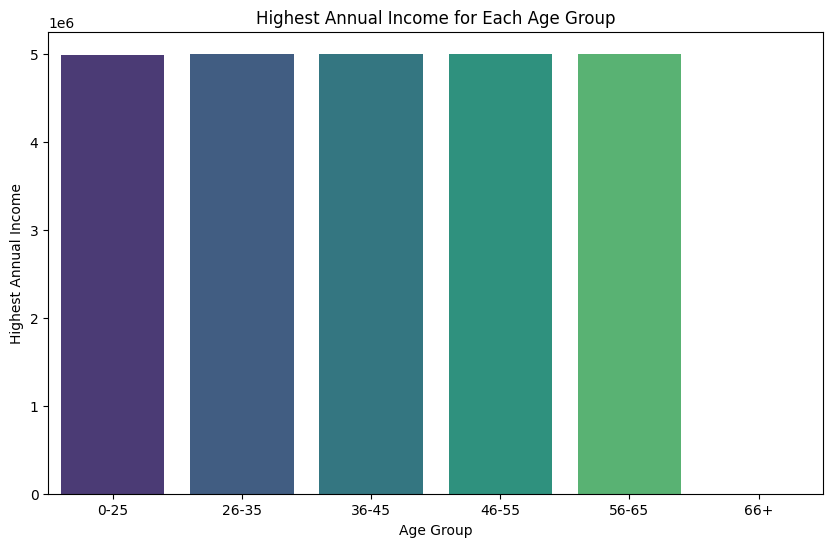

In [ ]:

# Create the 'Age_Group' column based on age ranges
bins = [0, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Find the highest annual income for each age group
highest_income_by_age = df.groupby('Age_Group')['Annual_Income'].max().reset_index()

# Print the age group with the highest annual income
highest_income_row = highest_income_by_age.loc[highest_income_by_age['Annual_Income'].idxmax()]
print(f"The age group with the highest annual income is: {highest_income_row['Age_Group']}")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_income_by_age, x='Age_Group', y='Annual_Income', palette='viridis')
plt.title('Highest Annual Income for Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Highest Annual Income')
plt.show()


In [ ]:

# First, create the 'Age_Group' column based on age ranges
bins = [0, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Group'] = pd.cut(merged_df['age'], bins=bins, labels=labels, right=False)

# Group by 'Age_Group' and calculate the mean annual income
income_by_age = df.groupby('Age_Group')['Annual_Income'].idxmax()

# Display the result
print(income_by_age)


Age_Group
0-25      6657
26-35      332
36-45    12404
46-55    14898
56-65    42062
66+      33750
Name: Annual_Income, dtype: int64


In [ ]:

from scipy.stats import pearsonr

data = df[['Annual_Income', 'age']].dropna()

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data['Annual_Income'], data['age'])

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.0024132070642716927
P-value: 0.608236153589466


Interpretation:

Strength of Relationship:

* The correlation coefficient is very close to zero (0.0011), indicating an extremely weak linear relationship between 'Annual Income' and 'Age.'
Direction of Relationship:

The positive sign suggests a positive correlation, but since the coefficient is close to zero, the correlation is very weak.


P-value:

The p-value associated with the correlation coefficient is 0.8206. A high p-value suggests that the observed correlation could be due to random chance, and there is no significant evidence to reject the null hypothesis that the true correlation is zero.


The age group with the highest annual income is 46-55 age group

**ANALYSIS PURPOSE**

In [ ]:

correlation_matrix = df[['Annual_Income', 'age']].corr()

# Extract the correlation coefficient between 'Annual Income' and 'age'
correlation_coefficient = correlation_matrix.loc['Annual_Income', 'age']

print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 0.0024132070642730362


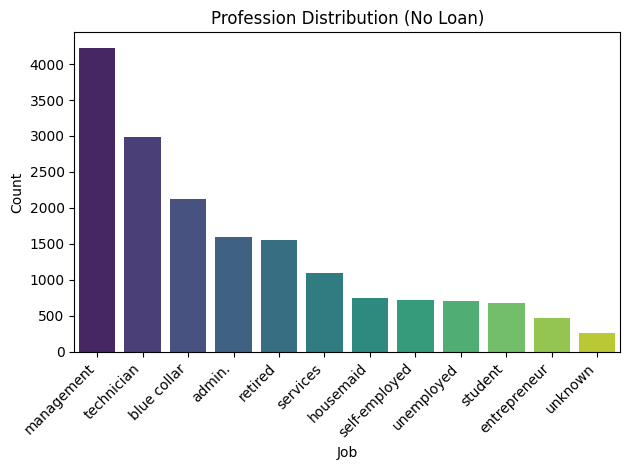

In [ ]:

no_loan_customers = df[(df['housing'] == 'no') & (df['personal_loan'] == 'no')]

# Plot the distribution of profession
plt.subplot(1, 1, 1)
sns.countplot(data=no_loan_customers, x='job', order=no_loan_customers['job'].value_counts().index, palette='viridis')
plt.title('Profession Distribution (No Loan)')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()